In [58]:
source("R/simulation.R")
source("R/deconvolution.R")
source("R/docker_linseed_pipeline/LinseedMetadata.R")
source("R/docker_linseed_pipeline/SinkhornNNLSLinseedC.R")
Rcpp::sourceCpp("R/docker_linseed_pipeline/pipeline.cpp")

In [128]:
options(repr.plot.width=16, repr.plot.height=8)

In [50]:
options(warn=-1)

In [197]:
init_lo2 <- function(
    data,
    top_genes,
    cell_types = 3,
    seed = 42
) {
    lo2 <- SinkhornNNLSLinseed$new(
        dataset = data,
        path = "linseed2_results",
        analysis_name = "deconv_comparison_2",
        cell_types = cell_types,
    )
    lo2$selectTopGenes(top_genes)
    lo2$scaleDataset(iterations = 20)
    lo2$getSvdProjectionsNew(k = cell_types)
    lo2$calculateDistances()
    lo2$selectInitRandom(seed = seed)
    lo2$plotPoints2D("init")
    lo2$plotDistances()
    lo2
}

visualize_lo2 <- function(lo2) {
    lo2$plotErrors()
    show(lo2$plotErrors() + facet_wrap(facets = "variable", scales = "free"))
    lo2$plotPoints2D("current")
}

## Simulation


Scaling dataset [==>-------------------------]  10% eta: 20s

Scaling dataset [===>------------------------]  15% eta: 26s

Scaling dataset [=====>----------------------]  20% eta: 28s

Scaling dataset [======>---------------------]  25% eta: 27s

Scaling dataset [=======>--------------------]  30% eta: 27s

Scaling dataset [=========>------------------]  35% eta: 25s

Scaling dataset [==========>-----------------]  40% eta: 25s

Scaling dataset [============>---------------]  45% eta: 23s

Scaling dataset [=============>--------------]  50% eta: 21s

Scaling dataset [==============>-------------]  55% eta: 19s

Scaling dataset [================>-----------]  60% eta: 17s

Scaling dataset [=================>----------]  65% eta: 15s

Scaling dataset [===================>--------]  70% eta: 13s

Scaling dataset [====================>-------]  75% eta: 11s

Scaling dataset [=====================>------]  80% eta:  9s

Scaling dataset [=======================>----]  85% eta:  6s

Scaling

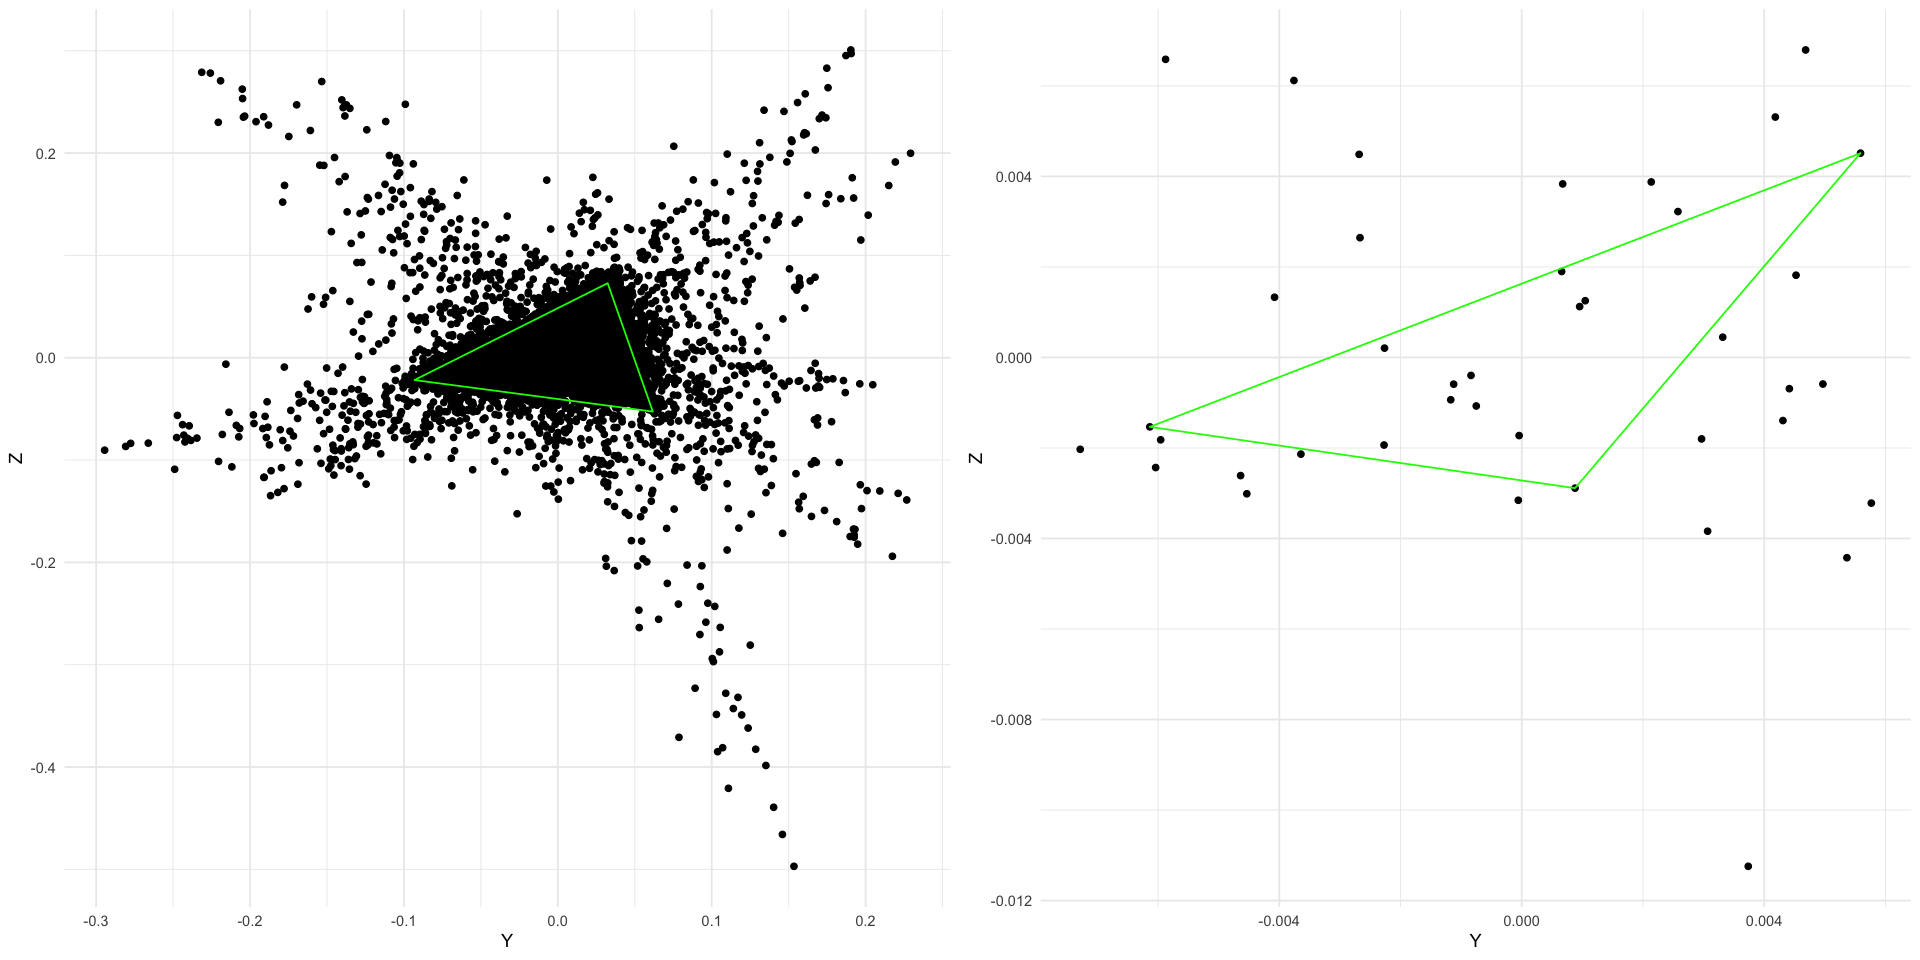

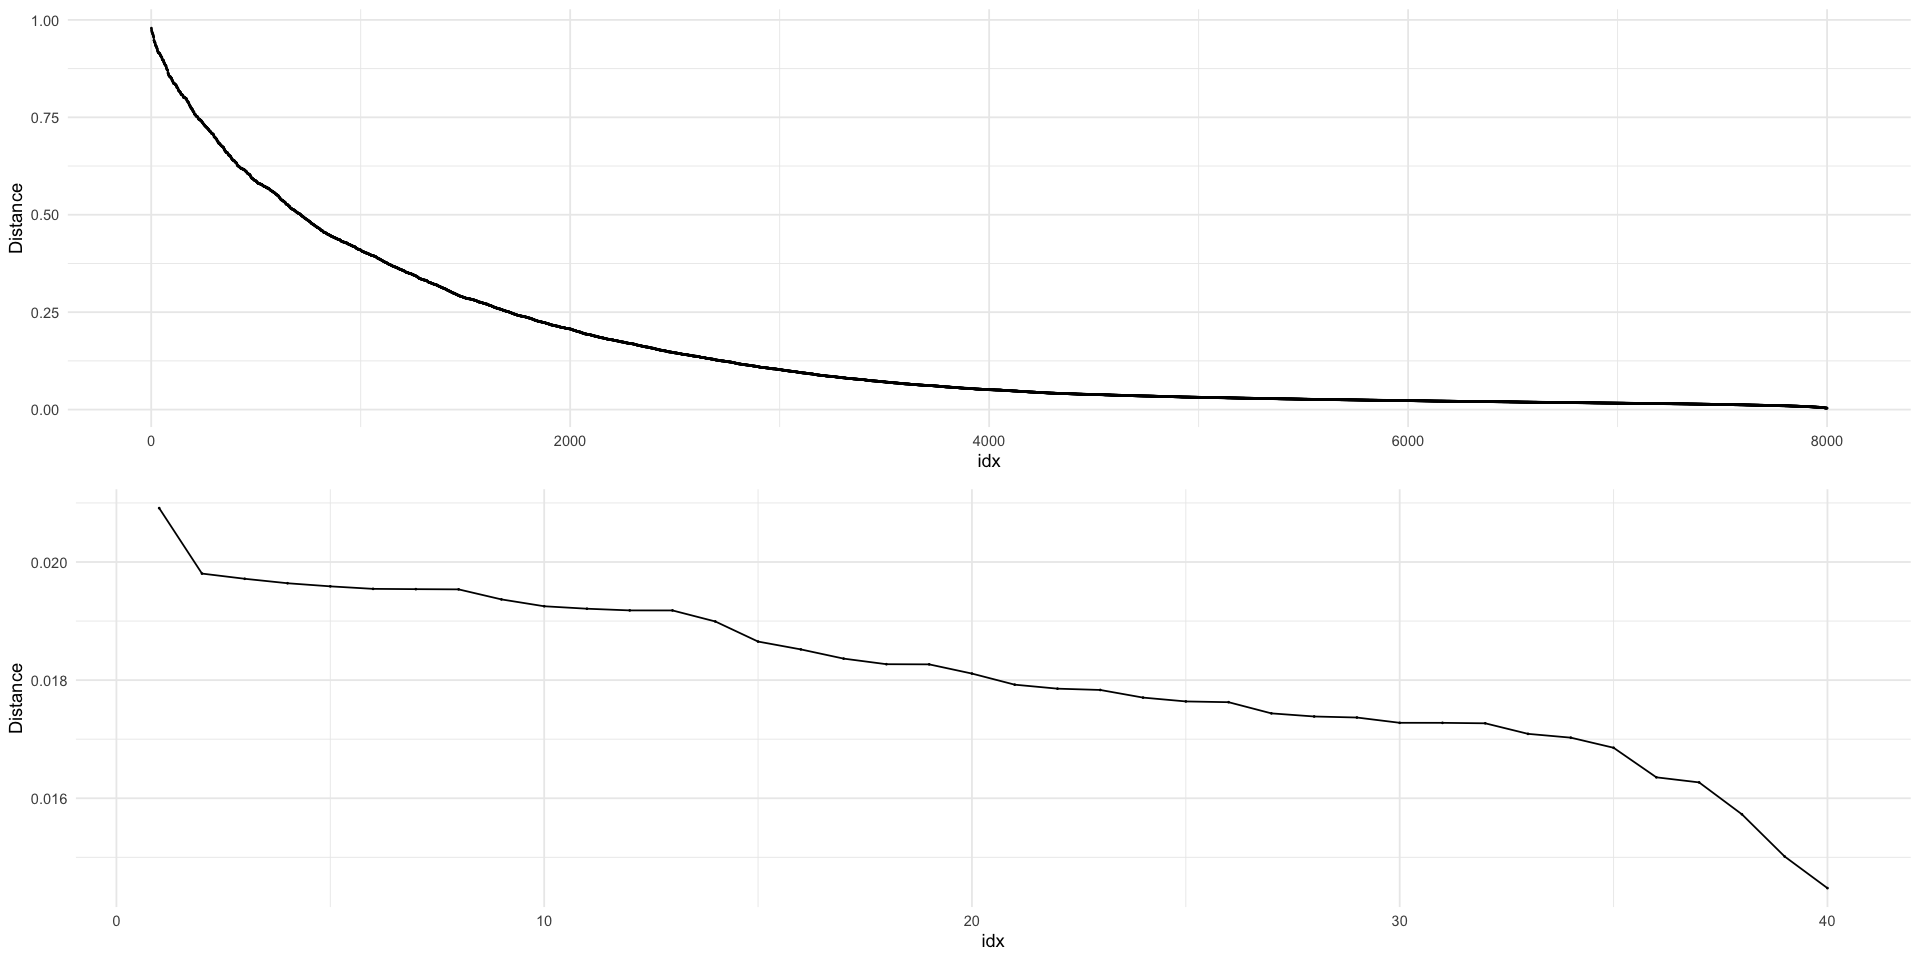

In [212]:
simulation <- createSimulation(n_genes = 12000, n_samples = 40, n_cell_types = 3)
simulation <- withNoise(simulation, 5)
sim_lo2 <- init_lo2(simulation$data, top_genes = 4000)

In [203]:
sim_lo2$filterByDistance(filter_genes = 200)


Scaling dataset [>---------------------------]   2% eta:  2m

Scaling dataset [>---------------------------]   3% eta:  2m

Scaling dataset [>---------------------------]   4% eta:  2m

Scaling dataset [>---------------------------]   5% eta:  3m

Scaling dataset [=>--------------------------]   6% eta:  3m

Scaling dataset [=>--------------------------]   7% eta:  3m

Scaling dataset [=>--------------------------]   8% eta:  3m

Scaling dataset [==>-------------------------]   9% eta:  3m

Scaling dataset [==>-------------------------]  10% eta:  3m

Scaling dataset [==>-------------------------]  11% eta:  3m

Scaling dataset [==>-------------------------]  12% eta:  3m

Scaling dataset [===>------------------------]  13% eta:  3m

Scaling dataset [===>------------------------]  14% eta:  3m

Scaling dataset [===>------------------------]  15% eta:  3m

Scaling dataset [===>------------------------]  16% eta:  3m

Scaling dataset [====>-----------------------]  17% eta:  3m

Scaling

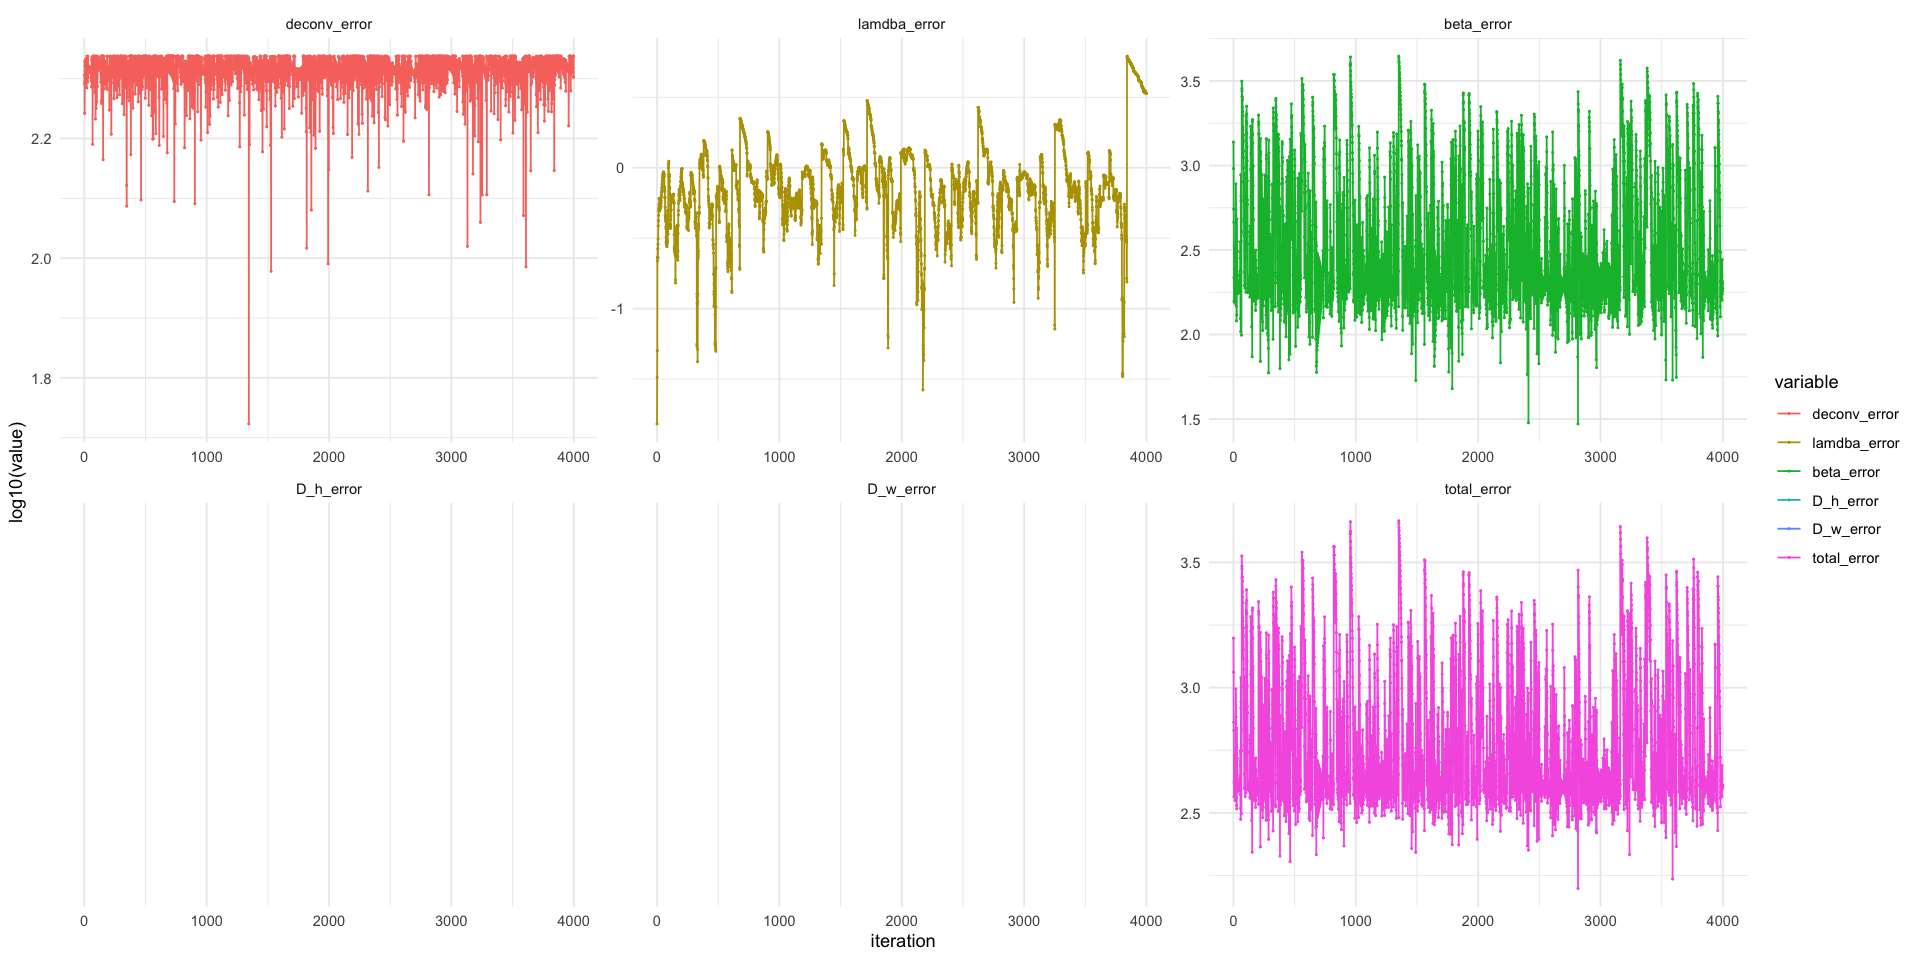

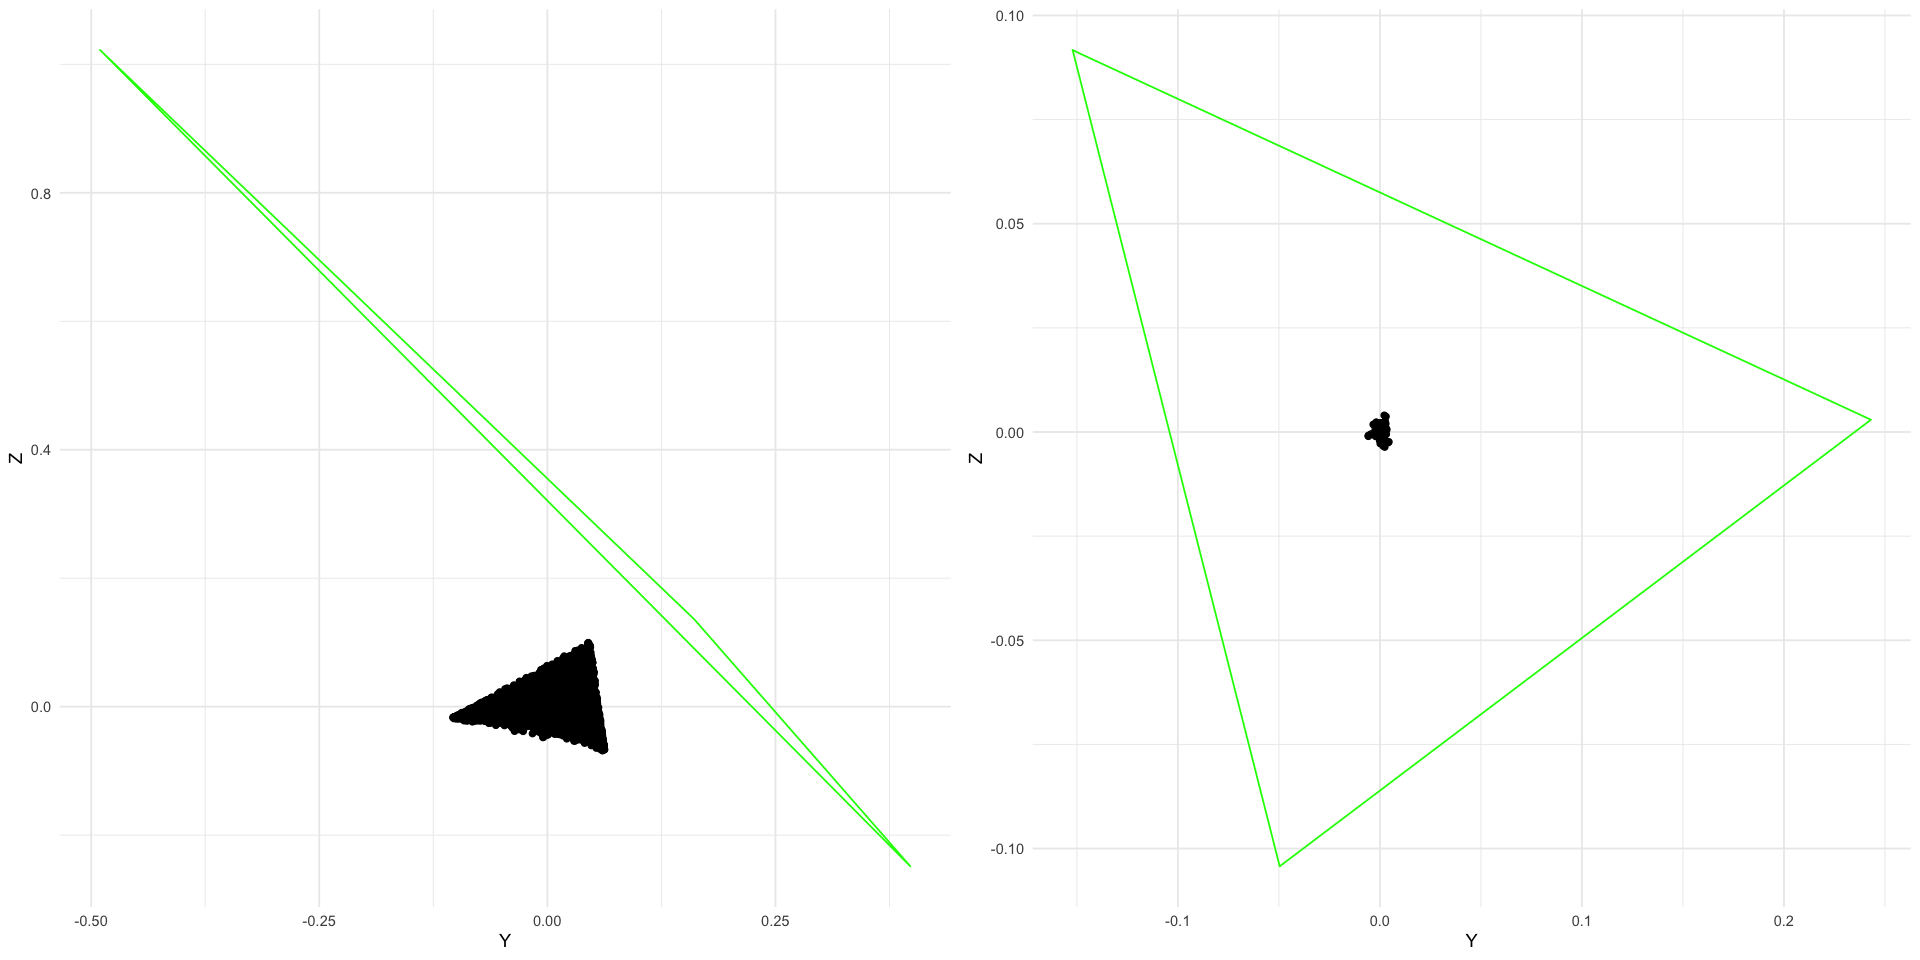

In [211]:
sim_lo2$runGradientBlock(
    coef_der_X = 0.001,
    coef_der_Omega = 0.001,
    coef_hinge_H = 1,
    coef_hinge_W = 10,
    coef_pos_D_h = 0,
    coef_pos_D_w = 0,
    iterations = 4000,
    startWithInit = F
)
visualize_lo2(sim_lo2)

## GSE19830

In [176]:
GSE19830.em <- ExpressionMix("GSE19830", verbose=TRUE)
GSE19830.mix <- CellMix::mixedSamples(GSE19830.em)
GSE19830.props.true <- coef(GSE19830.mix)

Loading dataset 'GSE19830' ... OK



Scaling dataset [===>------------------------]  15% eta:  1s

Scaling dataset [=====>----------------------]  20% eta:  1s

Scaling dataset [======>---------------------]  25% eta:  1s

Scaling dataset [=======>--------------------]  30% eta:  1s

Scaling dataset [=========>------------------]  35% eta:  1s

Scaling dataset [==========>-----------------]  40% eta:  1s

Scaling dataset [============>---------------]  45% eta:  1s

Scaling dataset [=============>--------------]  50% eta:  1s

Scaling dataset [==============>-------------]  55% eta:  1s

Scaling dataset [================>-----------]  60% eta:  1s

Scaling dataset [=================>----------]  65% eta:  1s

Scaling dataset [===================>--------]  70% eta:  1s

Scaling dataset [====================>-------]  75% eta:  1s

Scaling dataset [=====================>------]  80% eta:  0s

Scaling dataset [=======================>----]  85% eta:  0s

Scaling dataset [========================>---]  90% eta:  0s

Scaling

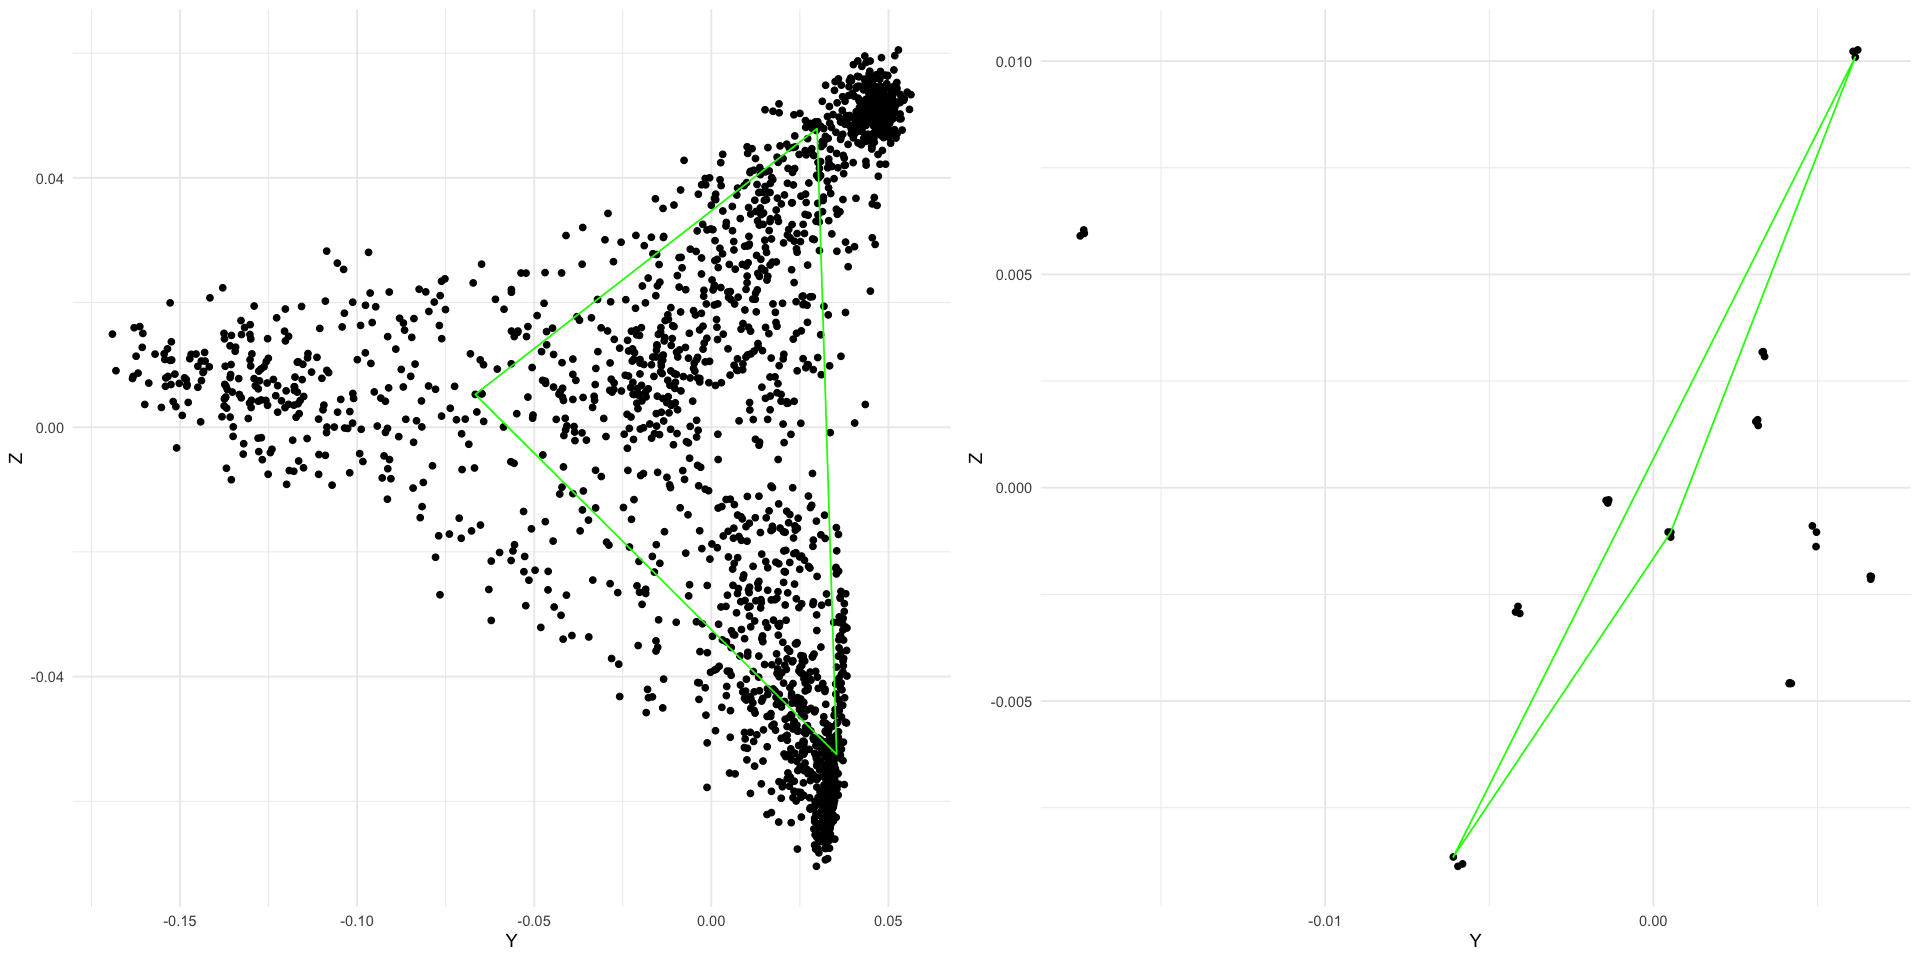

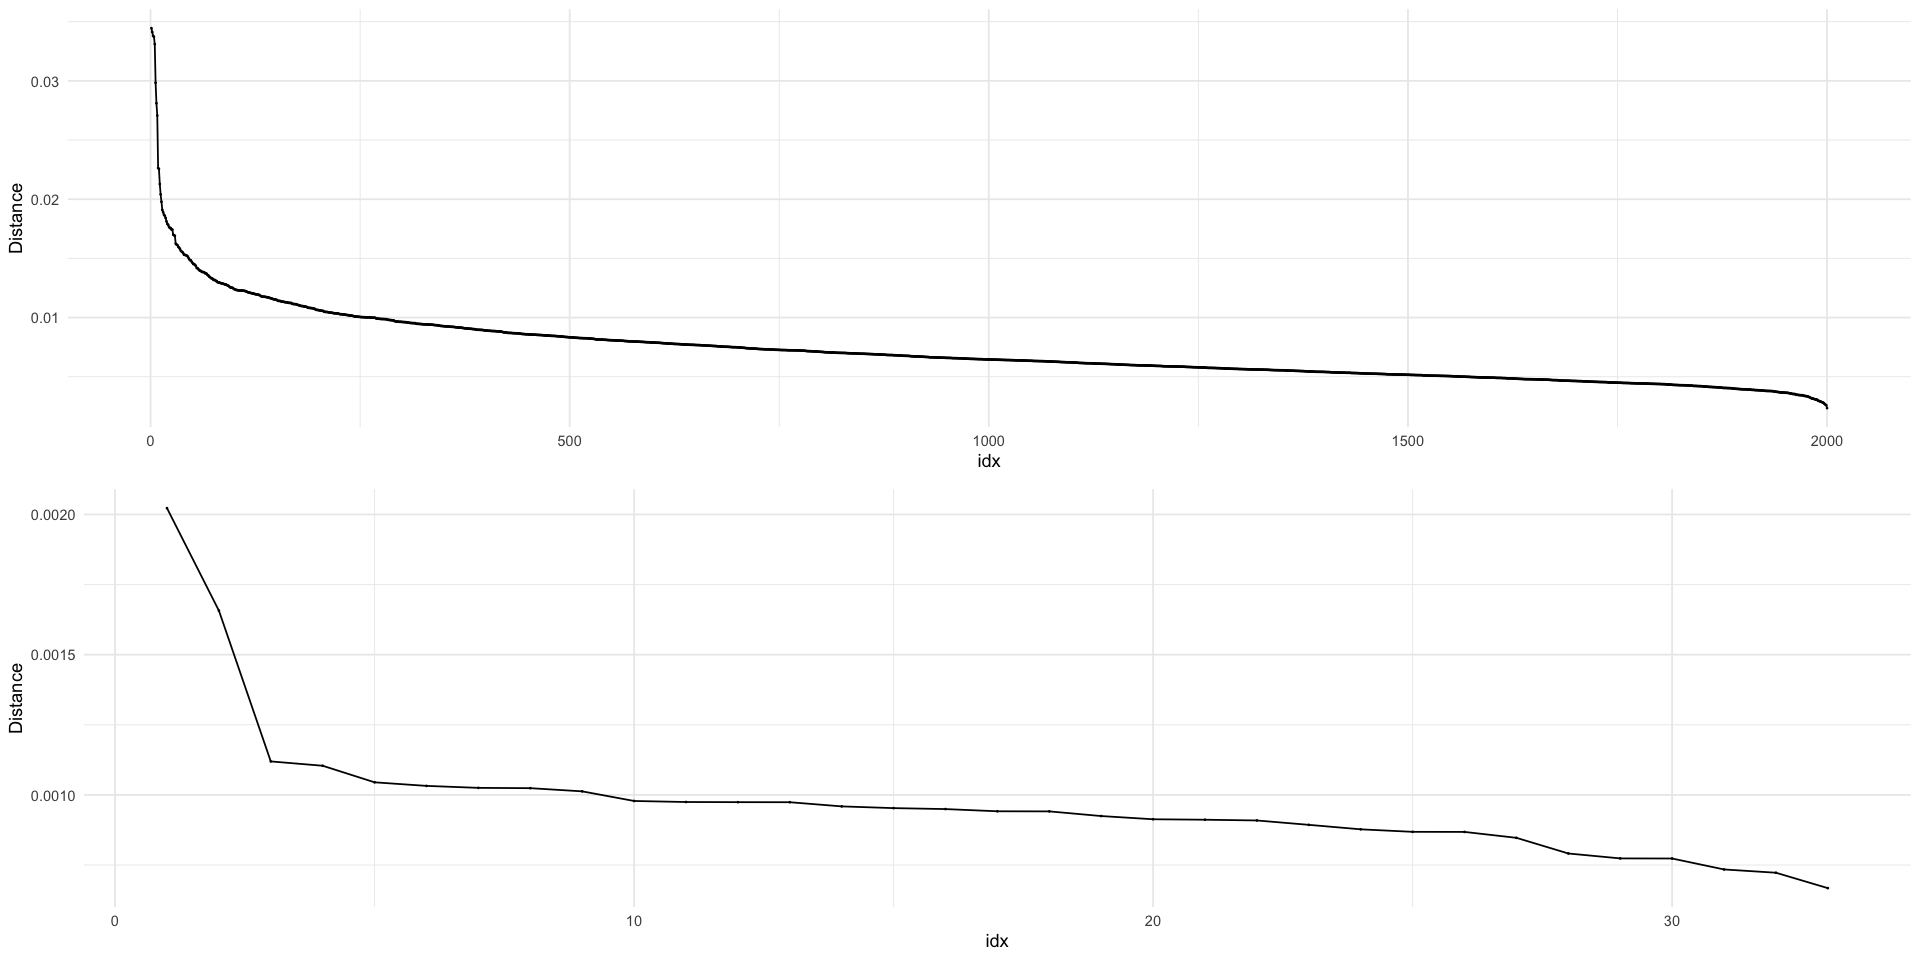

In [206]:
GSE19830_lo2 <- init_lo2(exprs(GSE19830.mix), 2000)

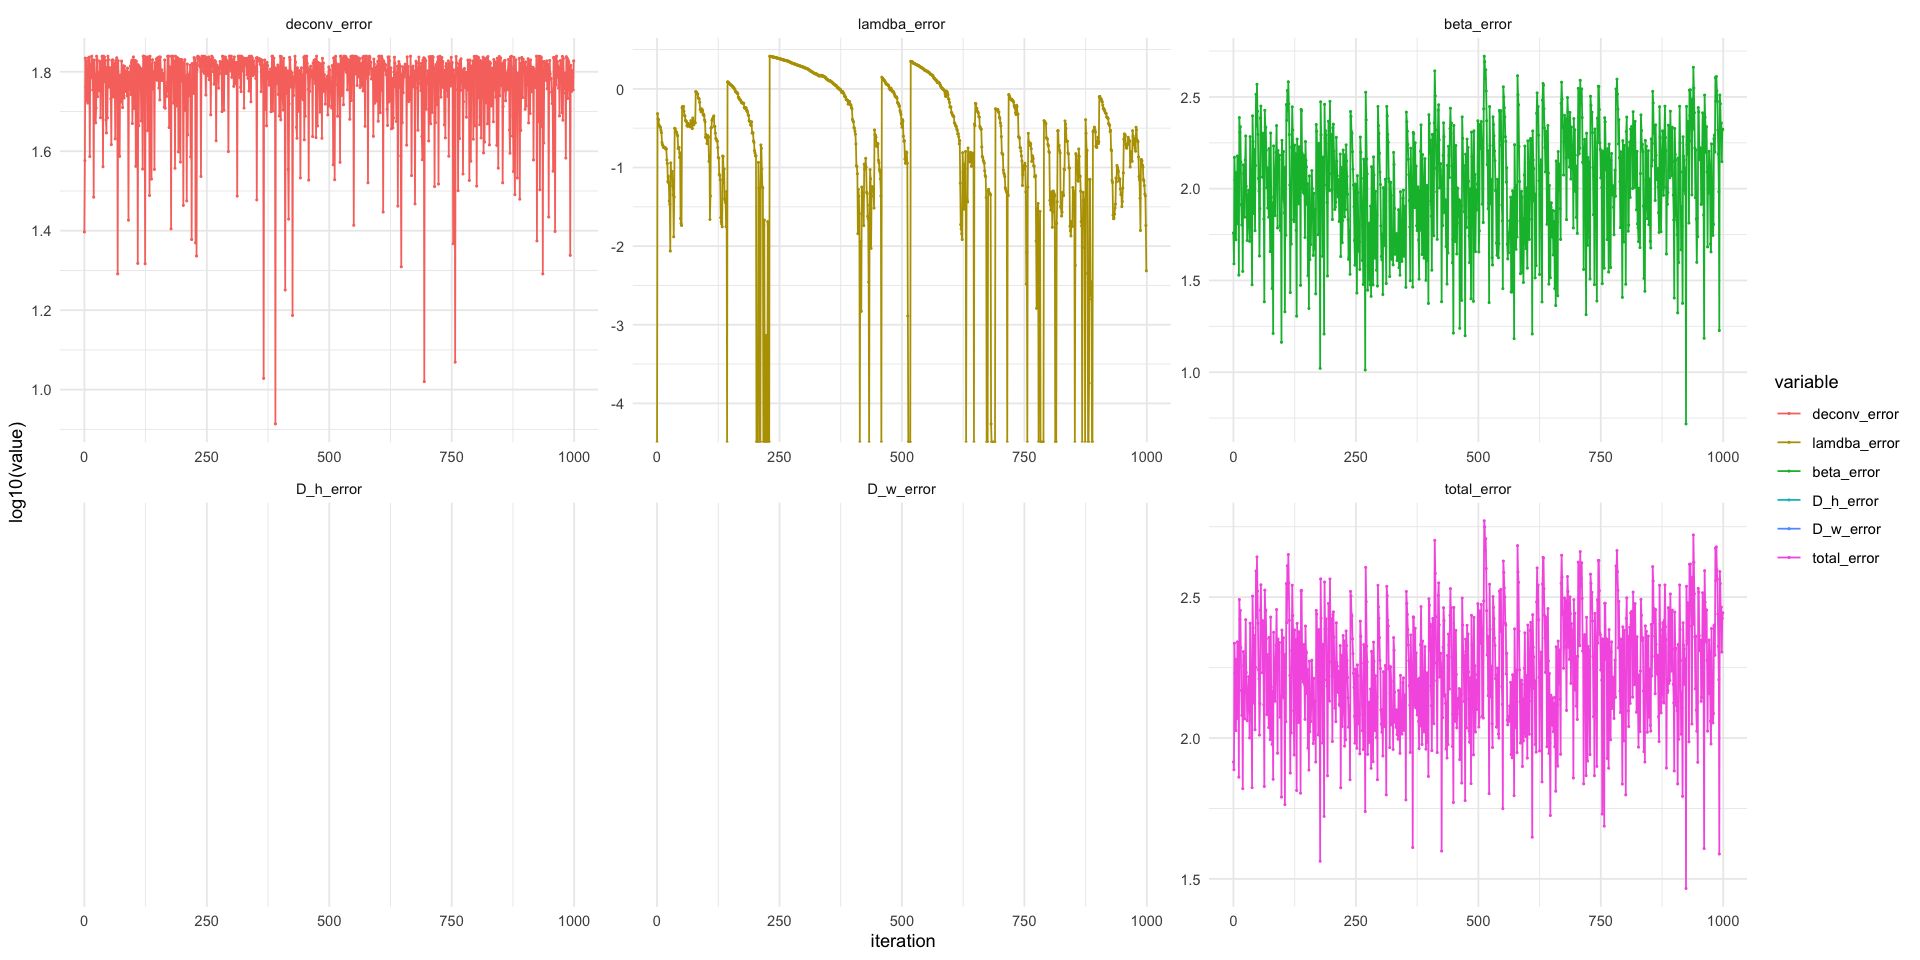

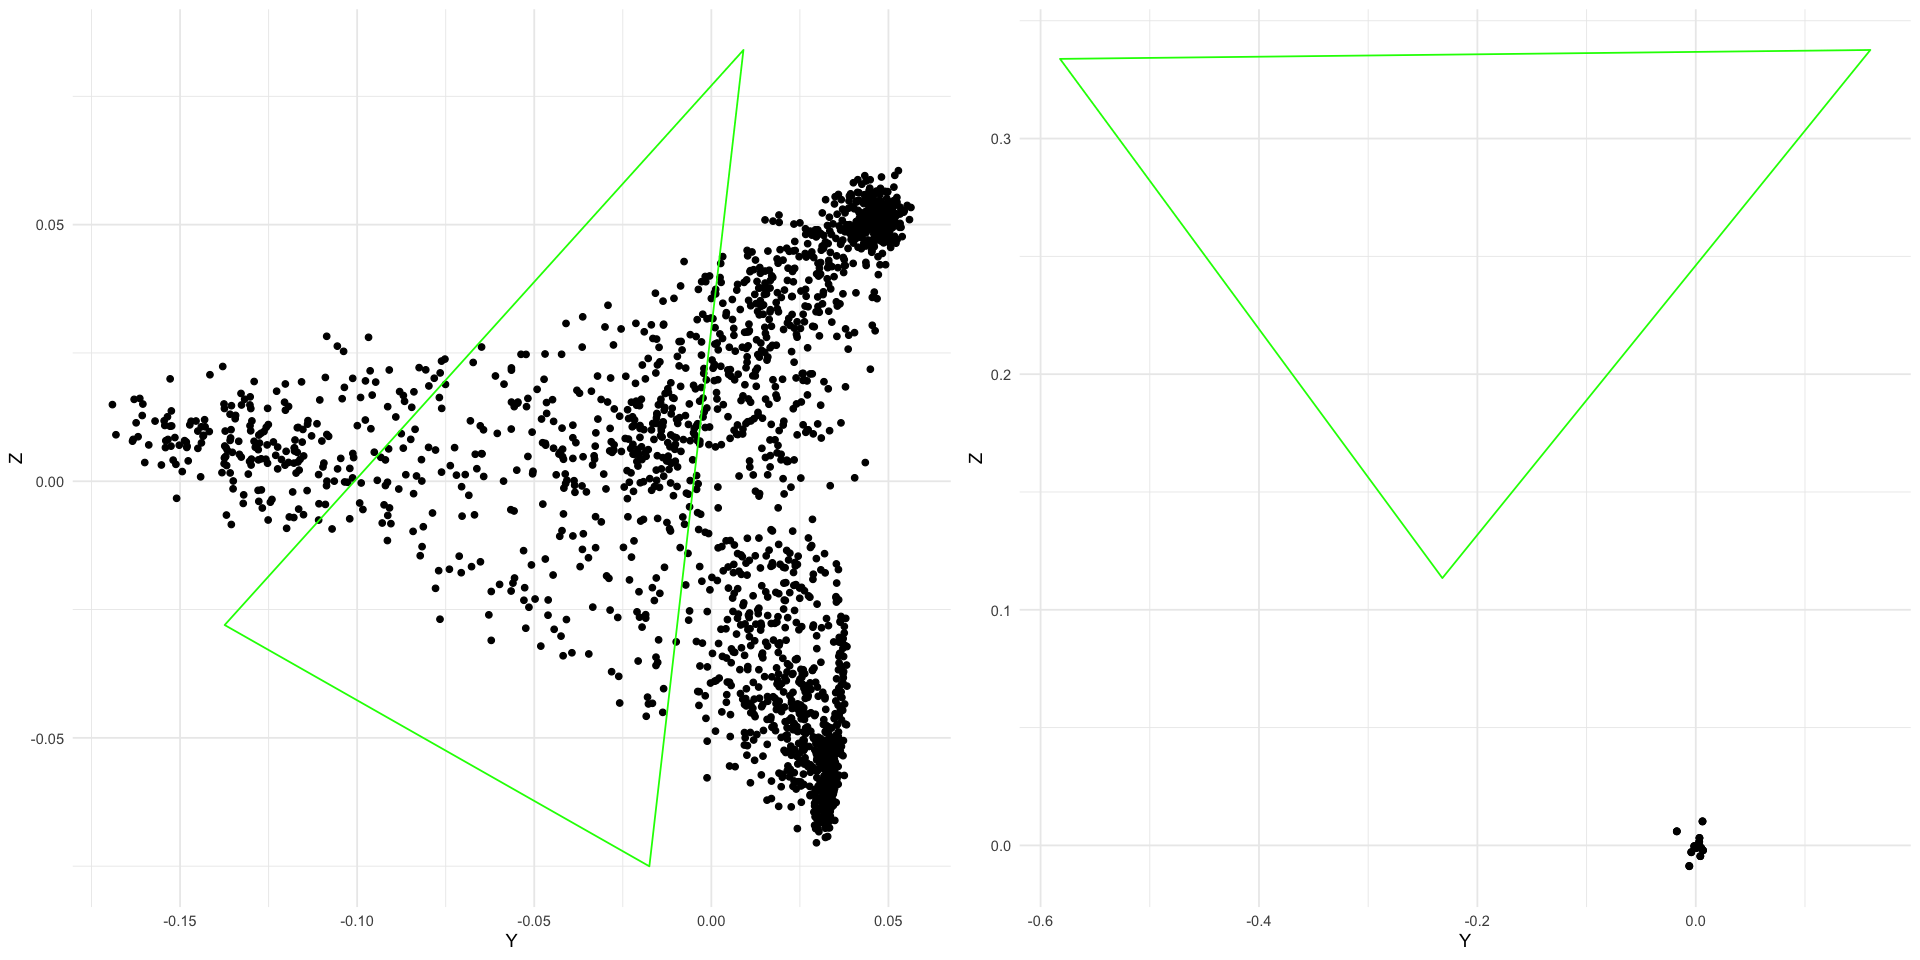

In [209]:
GSE19830_lo2$runGradientBlock(
    coef_der_X = 0.001,
    coef_der_Omega = 0.001,
    coef_hinge_H = 1,
    coef_hinge_W = 10,
    coef_pos_D_h = 0,
    coef_pos_D_w = 0,
    iterations = 1000,
    startWithInit = T
)
visualize_lo2(GSE19830_lo2)